# Loss Experiment

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

from src.models import MLP
from src.models import train
from src.utils import init_dataloader
from src.calc import LossCalculator
from src.visualize import LossVisualizer
from src.directions import RandomDirection
from src.directions import EigenDirection

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_loader = init_dataloader(
    dataset_name='MNIST',
    transform=transform,
    batch_size=64,
    dataset_load_path='data/',
    train_mode=True,
    size=64 * (10000 // 64)
)

test_loader = init_dataloader(
    dataset_name='MNIST',
    transform=transform,
    batch_size=64,
    dataset_load_path='data/',
    train_mode=False,
    size=64 * (10000 // 64)
)

In [3]:
model = MLP(layers_num=2, hidden=256, input_channels=1, input_sizes=(28, 28), classes=10).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train(model, criterion, train_loader, optimizer)

In [4]:
core = RandomDirection(model, criterion, train_loader)
calc = LossCalculator(model, criterion, train_loader, core)
vis = LossVisualizer(calc)

Grid point:   0%|          | 0/441 [00:00<?, ?it/s]

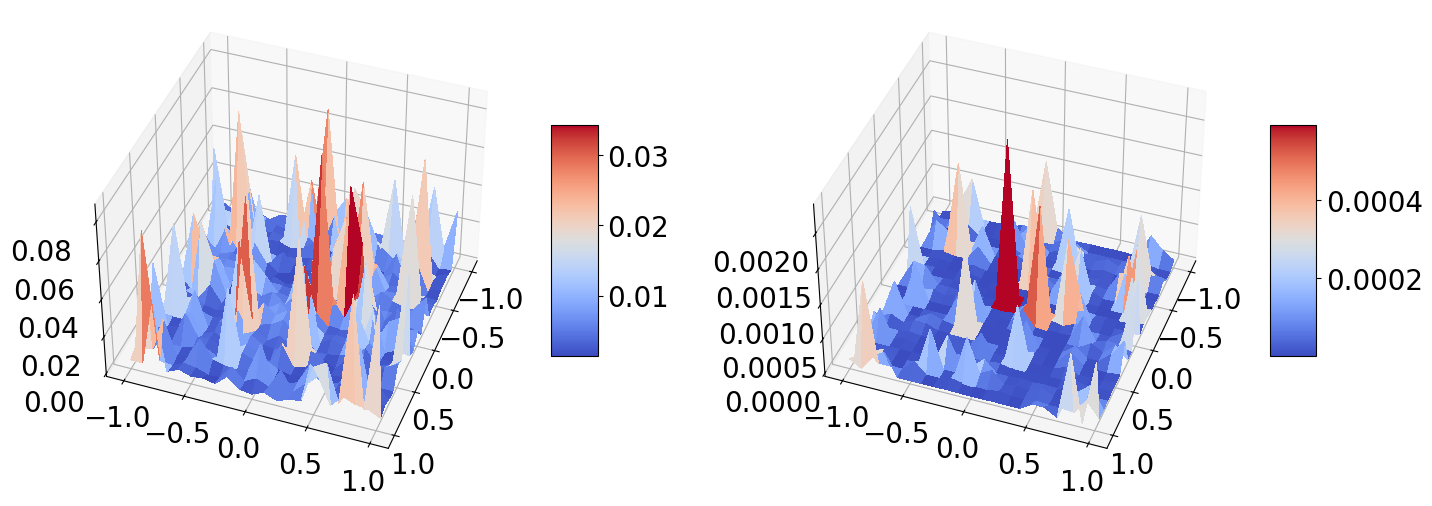

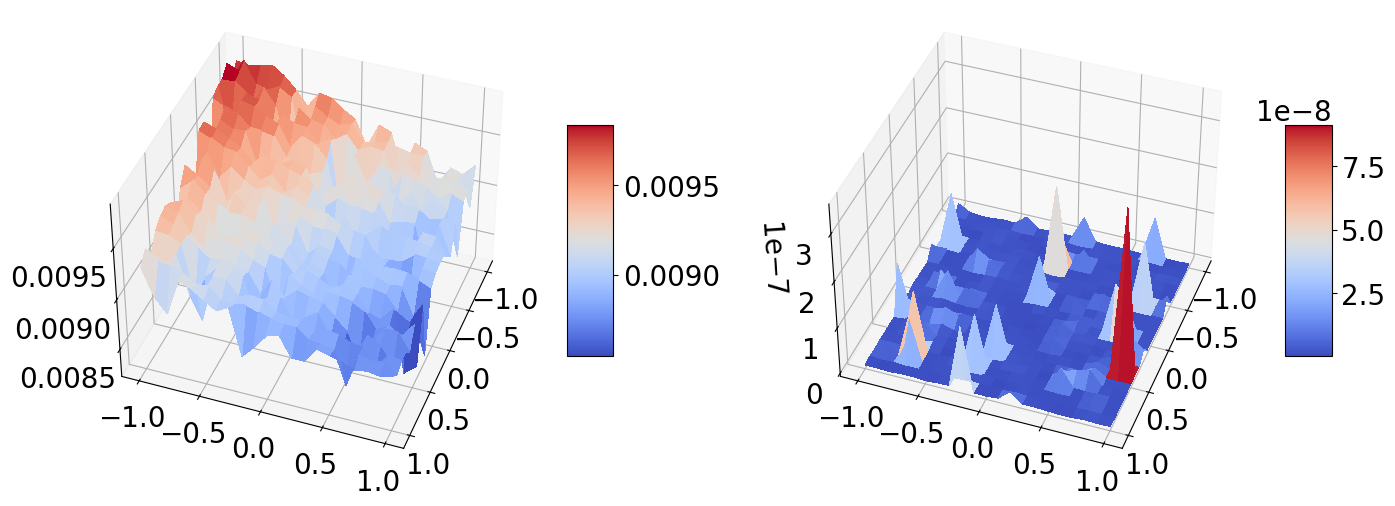

In [5]:
import matplotlib as mpl

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

vis.visualize_all(size1=1, size2=2)
vis.visualize_all(size1=-2, size2=-1)

In [6]:
core_e = EigenDirection(model, criterion, train_loader)
calc_e = LossCalculator(model, criterion, train_loader, core_e)
vis_e = LossVisualizer(calc_e)

Grid point:   0%|          | 0/441 [00:00<?, ?it/s]

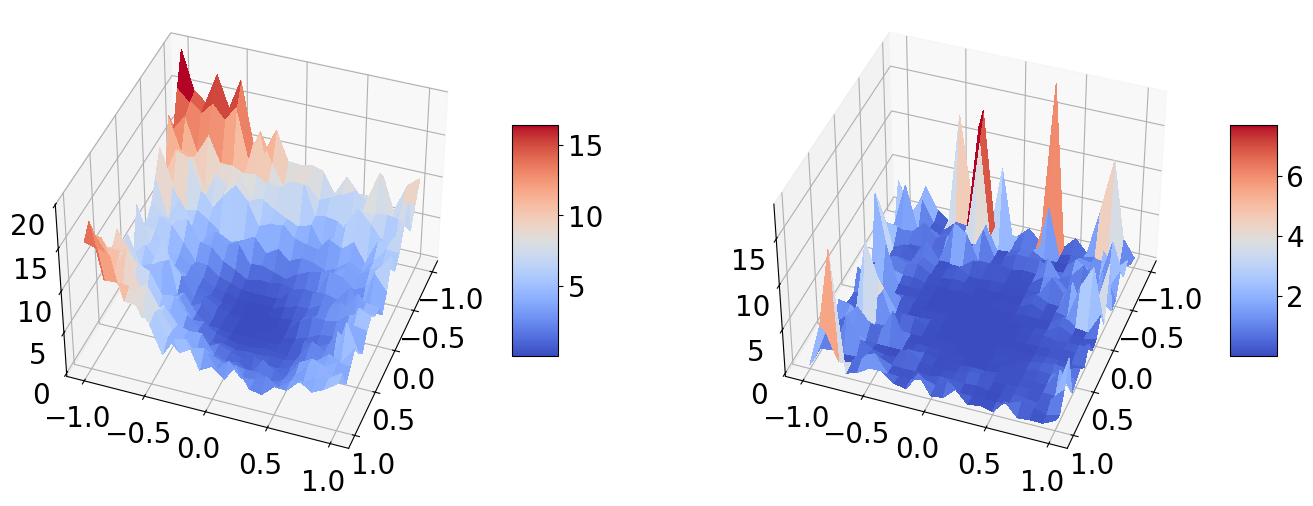

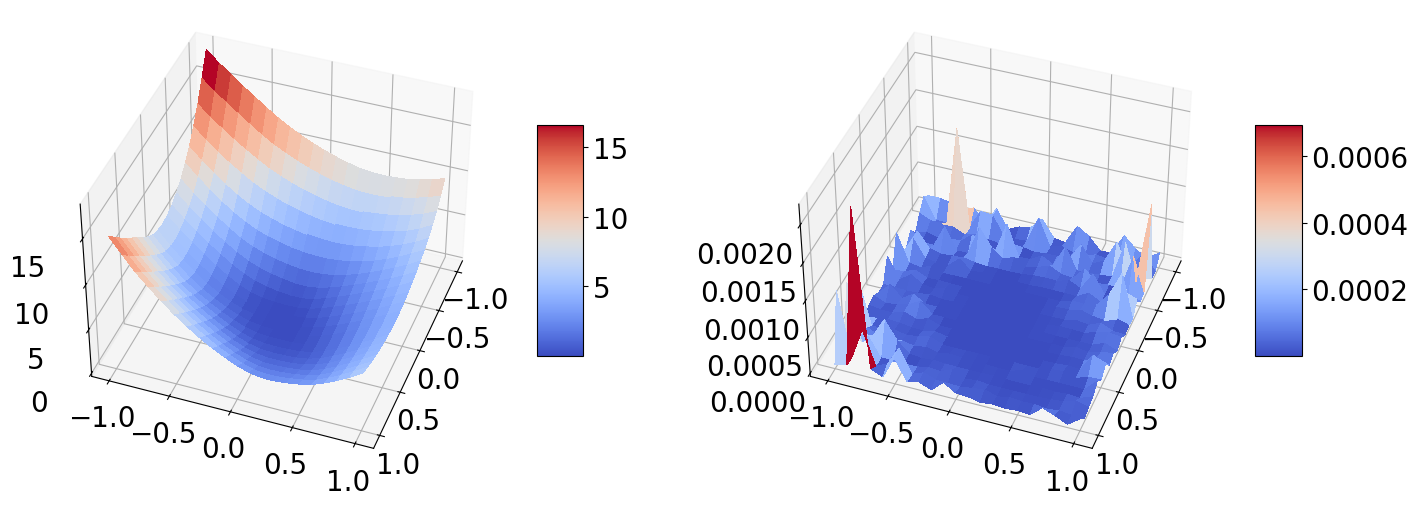

In [7]:
vis_e.visualize_all(size1=1, size2=2)
vis_e.visualize_all(size1=-2, size2=-1)